### 1. Data Import and Base Variable 확인
#### 1) Data Import and DataFrame
* 데이터 분석을 위해, dataframe을 생성하는 가장 일반적인 방법
    * notebook 파일을 생성한 폴더에 분석하고자 하는 data파일을(e.g. csv) 옮겨둔다.
    * data를 notebook으로 import.
    * pandas 명령어로 data를 dataframe으로 생성.
    * *tip : github는 push 할 수 있는 파일 1개 최대 용량이 100mb이므로 csv파일을 push할 경우 error발생  
github에 csv은 push 못하므로, csv 파일은 add 하지말고 ipynb(주피터노트북파일 확장자) 파일만 add *
***
* 바로 dataframe을 만들지 않는 이유
    * df을 여러 종류 만들 가능성(dfx,dfy 등)이 있기 때문에 이를 구분하기 위함  
    * 또한 사용된 dataframe이 어떤 주제 및 소재인지를 표시
     ***
    * data를 dataframe으로 직접 생성  
    df = pd.read_csv('train.csv')  
    ***
    * data와 dataframe을 각각 생성  
    아래에서 사용되는 df은 taxi와 관련된 data로 만들어진 dataframe이다.  
    *taxi를 dataframe의 name으로는 못 씀.   이미 data를 taxi로 정의함  
    하나의 이름을 data로 쓰는 경우와 dataframe으로 쓰는 경우를 명확하게 구분하기 위함*  
    taxi = 'train.csv'  
    df = pd.read_csv(taxi)
    ***

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
taxi = 'train.csv' # data import
df = pd.read_csv(taxi) # dataframe 생성

#### 2) DataFrame 구조 및 변수정보
##### (1) data 및 dataframe
 - shape           : row, column 개수 확인
 - head(), tail()  : 데이터 확인
 - describe()      : 각 column별 간략한 통계정보 
 - info()          : 각 column별 타입 정보
 
##### (2) 변수정보
 * id : 식별자 for each trip
 * vendor_id : 공급자 코드(a code indicating the provider associated with the trip record)
 * pickup_datetime : 탑승 날짜 및 시각(date and time when the meter was engaged)
 * dropoff_datetime : 하차 날짜 및 시각(date and time when the meter was disengaged)
 * passengers in the vehicle : 승객수(driver entered value)
 * pickup_longitude : 탑승 경도(the longitude where the meter was engaged)
 * pickup_latitude : 탑승 위도(the latitude where the meter was engaged)
 * dropoff_longitude : 하차 경도(the longitude where the meter was disengaged)
 * dropoff_latitude : 하차 위도(the latitude where the meter was disengaged)
 * store_and_fwd_flag : 차량메모리 보관여부(this flage indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server. Y = store and forward, N = not a store and forward trip)
 * trip_duration : duration of the trip in seconds

In [ ]:
df.shape # observation 및 column(변수) 갯수 확인

In [ ]:
df.head() # data확인(head() 위 5개, tail() 아래 5개)

In [ ]:
df.describe() # 변수별 기초통계량 확인(mean과 50%비교, real변수와 category변수 확인)

In [ ]:
df.info() # Variable Type 확인

### 2. Data Pre-Processing
#### 1) Datatime Type Vriable Modify 

* **Datetime Type Conversion**
    * pickup_datetime, dropoff_datetime은 type이 datetime이어야 시간변수로 활용할 수  
    있으나, object(=string)임
    * 시간변수로 활용하기 위해 type을 datetime으로 바꿔줘야 함
    * pandas의 to_datetime을 활용해 type을 datetime으로 바꿔줄 수 있음
    * datafrme의 변수타입을 변경하는 코드는 다음과 같음
        * 방법 1  
        taxi_df.pickup_datetime = pd.to_datetime(taxi_df.pickup_datetime)  
        * 방법 2  
        taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df['pickup_datetime']) 
    * dataframe에서 새로운 변수를 생성할 경우 등호(=)의 오른쪽은 df.변수명, df['변수명']  
    둘다 상관 없으나, 새로운 변수명(왼쪽)은 df['변수명']으로 적어야 생성됨  
    새로운 변수명(왼쪽)을 df.변수명으로 적을 경우 kernel이 작동하지만 실제로 생성은 안됨

In [ ]:
df.pickup_datetime.dtype # 시간변수 type 확인

In [3]:
# 컴퓨터가 느릴 경우 여기서 샘플링
df = df.sample(frac = 0.1, replace = False, random_state = 0) # sampling
df.shape # sampling됐는지 확인

(70178, 11)

#### 2) Use the Pandas.Datetimeindex module
* dataframe_name.datetime_variable_name.dt.**option**  
**option**(year, month, day, hour, dayofyear, dayofweek 등)은 [참고링크](https://pandas.pydata.org/pandas-docs/stable/api.html#datetimeindex)에서 확인  
    * (e.g.)dayofweek = The day of the week with Monday=0, Sunday=6

***
* 특정 변수 생성(datetime variable에서 연, 월, 일 각각 변수로 분리)  
일 변수 : taxi_df['pickup_day'] = taxi_df.pickup_datetime.dt.day  
* 단위 변환한 변수 생성(week 기준 몇번째 일이냐, 요일 변수 생성)  
요일변수 : taxi_df['wday'] = taxi_df.pickup_datetime.dt.weekday

In [4]:
# 시간변수 type을 datetime type으로 변환(pandas datetimeIndex 이용)
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)

In [5]:
# 탄 시간, 일, 월, 연도를 카테고리 타입의 변수로 생성
df['pickup_hour'] = df.pickup_datetime.dt.hour.astype('category')
df['pickup_day'] = df.pickup_datetime.dt.day.astype('category')
df['pickup_month'] = df.pickup_datetime.dt.month.astype('category')
df['pickup_year'] = df.pickup_datetime.dt.year.astype('category')

In [6]:
# 연도, 주 기준 변수 생성
df['yday'] = df.pickup_datetime.dt.dayofyear.astype('category')
df['wday'] = df.pickup_datetime.dt.dayofweek.astype('category')
df['nwday'] = df.pickup_datetime.dt.weekday_name.astype('category')

In [7]:
df.vendor_id = df.vendor_id.astype('category') # vendor_id type category

In [ ]:
# 참고 skip
# pickup - dropoff의 계산을 통해 trip_duration 검증 및 pickup, dropoff, trip_duration 변수 관계 확인
#df.trip_duration_c = df.dropoff_datetime - df.pickup_datetime

# trip_duration_c는 day단위로 산출됨.
#df.trip_duration_c = df.trip_duration_c.dt.total_seconds() # second로 단위 변환

#### 3) Create Category Variable
* pickup_month가 1월 ~ 4월까지 밖에 없음(kaggledata는 6월까지)
* 1, 2, 3월은 겨울의 계절성을 반영하고, 4, 5, 6월은 봄 ~ 초여름의 계절성을 반영한다고 가정함.
    * 사람들이 기후조건이 가혹할수록 더 택시를 오래 타고 있는다고 가정(날이 추우면 최대한 목적지에 가까운 장소까지 택시를 타고 간다.)
    * 이 가정을 반영하기 위해서는 뉴욕의 날씨를 확인해서 비오는 날과 맑은 날, 날짜별 온도를 변수화해서 반영하는 것이 보다 정확할 것으로 생각함 
        * 변수 2개 생성(날짜별로 비 or 눈이 왔다 0 나머지 1, 기온이 00도 이상 or 00도 이하 0, 나머지 1)해서 pickup_datetime으로 merge.
    * 가장 rough하게 변수를 생성해서 모형을 실행한 다음 이 변수가 유의미할 경우 더 세밀하게 변수를 조정하는 것이 나을 듯함
    
    
* 계절성을 반영한 분기별 카테고리 변수(pickup_month_c) 생성 1, 2, 3월은 0, 4, 5, 6월은 1의 값을 가짐.

In [106]:
# 1, 2, 3월은 0, 4, 5, 6월은 1) 
df['pickup_month_c'] = df.pickup_month.replace([1, 2], '0')
df['pickup_month_c'] = df.pickup_month_c.replace([3, 4], '1')

df.pickup_month_c = df.pickup_month_c.astype('category')# type 변경(to category) 및 type 확인

In [107]:
# 월~금요일은 0, 토~일요일은 1
df['wday_c'] = df.pickup_month.replace([0, 1, 2, 3, 4], '0')
df['wday_c'] = df.pickup_month_c.replace([5, 6], '1')

df.wday_c = df.wday_c.astype('category')# type 변경(to category) 및 type 확인

In [97]:
# 일상, 여행으로 trip종류 구분(trip_duration이 60000(16시간)이상인 경우 여행)

def alert(df):
    if df['trip_duration'] <= 60000:
        return '0'
    elif df['trip_duration'] > 60000:
        return '1'
    
df['trip_c'] = df.apply(alert, axis=1)
df.trip_c = df.trip_c.astype('category') # trip_c type category

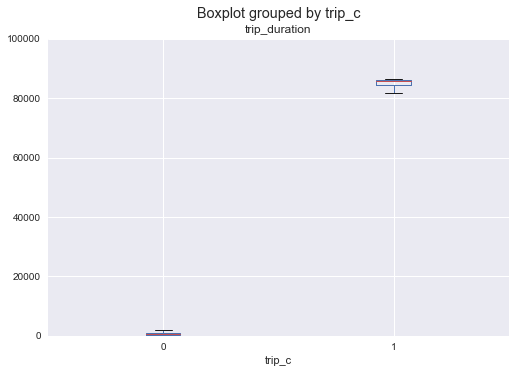

In [98]:
df.boxplot("trip_duration", "trip_c")
plt.ylim(-10, 100000)
plt.show()

* *참고 : boxplot 보는 방법*
<img src="boxplot-1.png">
* *참고 : 그래프 저장 방법*  
from pylab import figure, axes, pie, title, savefig #savefig추가  
savefig('boxplot.png') # graph 이미지 저장

* *Sampling  (위에서 했으니까 skip)*
    * 분석하거나 그래프 그릴 때 모든 데이터를 사용할 경우 수행시간이 너무 길어짐  
이에 sample 사용

In [ ]:
month_group = df.groupby('pickup_month') # original data 확인을 위해 grouping

In [ ]:
month_group.count() # pickup_month의 variable*column별 관측치 수 확인

# size함수를 통해 pickup_month의 value별 관측치 수 확인(count와 size의 차이 : size는 NaN값을 포함해서 세고, count는 NaN값을 세지 않음)
# month_group.size().sort_values(ascending = False)

In [ ]:
# 위에서 했으므로 여기서는 실행 안함. 원래 여기서 시행해야 아래 표와 차이 발생
# df = df.sample(frac = 0.1, replace = False, random_state = 0) # sampling
# df.shape # sampling됐는지 확인

In [ ]:
# sample이 골고루 뽑혔는지 확인
# month_group.count()의 output과 비교. 월별 갯수 비중 확인

# pickup_month data 확인을 위해 grouping
month_group = df.groupby('pickup_month')
# pickup_month의 variable*column별 관측치 수 확인
month_group.count()

#### 4) data log 변환
* trip_duration의 단위는 second로 log변환 가능
* trip_duration에 +1(scaling)을 한 후 log 변환 수행  
*original 값에 +1을 하는 이유 :
original 값이 0인 경우 log변환하면 1이 되어버림 따라서, 모든 original 값에 1을 더함*
* tirp_duraiont+1을 log변환 함
* original 값과 log변환 값 비교

In [48]:
df['logtrip_duration'] = np.log(df.trip_duration + 1)

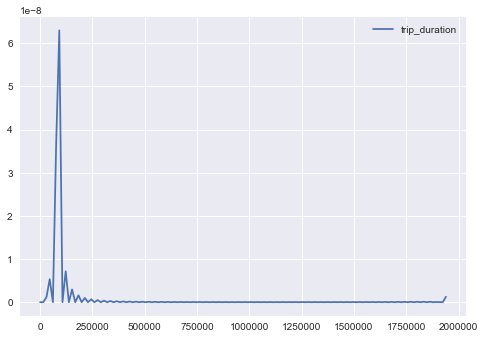

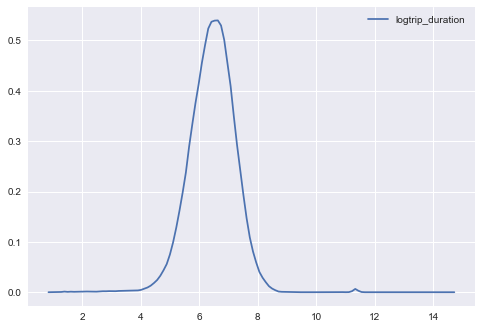

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_color_codes()

sns.kdeplot(df.trip_duration) # kernel density grahp (높이(x가 뽑힐 확률)는 큰 의미 없음, 넓이가 중요(넓이의 합은 1))
plt.show()

sns.kdeplot(df.logtrip_duration) # 정규분포와 더 유사한 분포가 됨
plt.show()

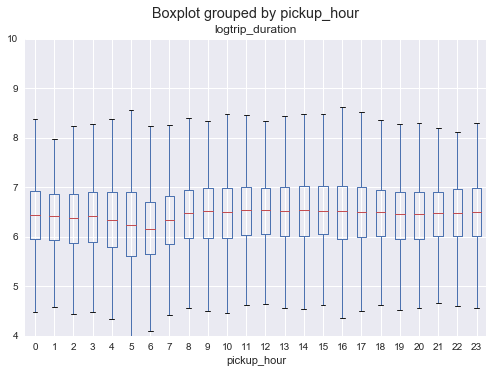

In [154]:
df.boxplot("logtrip_duration", "pickup_hour")
plt.ylim(4, 10)
plt.show()

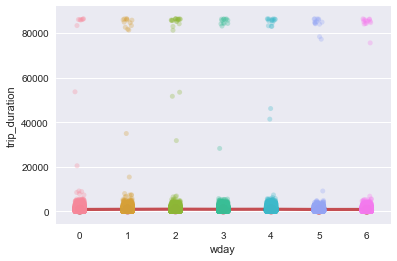

In [82]:
sns.stripplot(x="wday", y="trip_duration", data=df, jitter=True, alpha=.3)
sns.pointplot(x="wday", y="trip_duration", data=df, dodge=True, color='r')
plt.show()

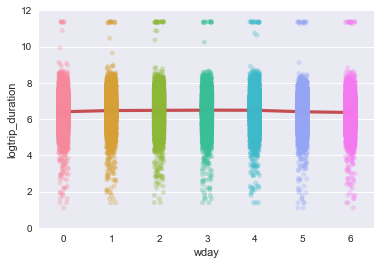

In [90]:
sns.stripplot(x="wday", y="logtrip_duration", data=df, jitter=True, alpha=.3)
sns.pointplot(x="wday", y="logtrip_duration", data=df, dodge=True, color='r')
plt.ylim(0, 12)
plt.show()

#### tip : 기존 dataframe에 변수를 추가했을 때 활용할 수 있는 명령어(변수명 변경, 변수 삭제, 변수 순서 변경)
* 변수명(column) 변경(rename)
    * 방법1 : df = df.rename(columns = {'oldname1' : 'newname1', 'oldname2' : 'newname2'})
    * 방법2 : df.rename(columns = {'oldname1' : 'newname1', 'oldname2' : 'newname2'}, inplace = True)
* 잘못 생성한 변수(column) 삭제(drop)
    * 방법1 : df = df.drop('column_name', axis = 1)  
    *axis = 1은 dataframe의 column을 의미(0은 row)*
    * 방법2 : df.drop('column_name', axis = 1, inplace = True)
* 변수(column) 순서 변경(order or insert)
    * 방법1 : df = df.[['column1', 'column2']]
    * 방법2 : 특정자리에 특정 변수 삽입
        * get a list of columns   
        cols = list(df)
        * move the column to head of list using index, pop and insert  
        cols.insert(0, cols.pop(cols.index('column_name')))
        * use loc to reorder(라벨을 활용할 경우 loc, 위치 index를 활용할 경우 iloc)  
        df = df.loc[:, cols]                  

In [126]:
# 변수 순서 조정
cols = list(df) # dataframe을 list로 type변환 -> 변수명만 포함한 리스트(cols) 생성
cols.insert(0, cols.pop(cols.index('trip_duration'))) # 종속변수를 잘라내어(pop) cols맨 앞(index 0)에 삽입(insert)
cols.insert(1, cols.pop(cols.index('logtrip_duration')))
cols.insert(2, cols.pop(cols.index('pickup_month_c'))) # 독립변수1를 잘라내어(pop) index 2에 삽입(insert)
cols.insert(3, cols.pop(cols.index('wday_c')))
cols.insert(4, cols.pop(cols.index('vendor_id')))
cols.insert(5, cols.pop(cols.index('pickup_day')))
cols.insert(6, cols.pop(cols.index('pickup_hour')))
cols.insert(7, cols.pop(cols.index('passenger_count')))
cols.insert(8, cols.pop(cols.index('trip_c')))
cols.insert(9, cols.pop(cols.index('pickup_month')))
cols.insert(10, cols.pop(cols.index('wday')))
df = df.loc[:, cols] # 행은 그대로, 열은 cols(변수명 리스트)로 다시 구성

#### 5) Outlier 확인 및 삭제
##### (1) Outlier를 직접 확인, 판단, 삭제
* outlier 삭제(trip_duration이 1750000초 이상인 경우 빈도가 매우 적고 숫자가 너무 커 outlier로 판단) 
* *trip_duration이 20,000초 이상(5시간 이상)인 경우는 일반적인 상황이 아닌 것(분석 data에서 제외)으로 고려하고 분석할 수 있을 것으로 판단*  

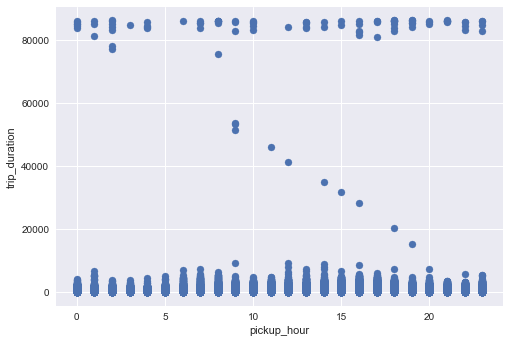

In [109]:
plt.scatter(df.pickup_hour, df.trip_duration)
plt.xlabel("pickup_hour")
plt.ylabel("trip_duration")
plt.show()

In [110]:
# 이상치라 판단되는 data확인
df[df.trip_duration >= 1750000]

# 아래의 형식으로도 확인 가능(특정 범위)
# df[(df.trip_duration >= 1750000) & (df.trip_duration <= 2000000)]

,trip_duration,logtrip_duration,vendor_id,pickup_month_c,wday_c,pickup_day,pickup_hour,passenger_count,trip_c,pickup_month,...,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_year,yday,nwday


In [53]:
# 특정 관측치 삭제
#df = df.drop([682482])
#df = df.drop()(axis=0)

# 특정 범위만 grab
df = df[df.trip_duration <= 1750000]
#df[(df.trip_duration >= 1750000) & (df.trip_duration <= 2000000)]

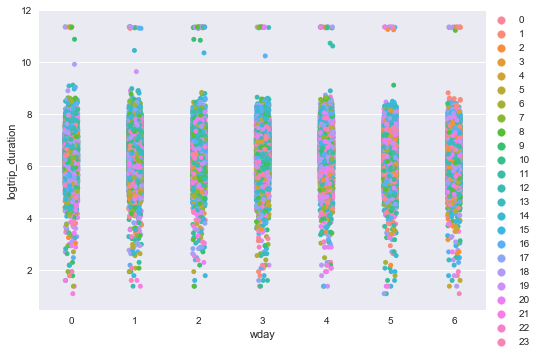

In [111]:
# 삭제되었는지 확인
sns.stripplot(x="wday", y="logtrip_duration", hue = "pickup_hour", data = df, jitter = True)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)
plt.show()

##### (2) OLS분석을 통해 Outlier 확인 및 삭제

* OLS를 통해 확인하는 방법
    * ols를 통해 레버리지와 잔차를 계산하여 이를 근거로 outlier 규정

In [96]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [108]:
model_chas = sm.OLS.from_formula("logtrip_duration ~ C(wday)", data=df)
sm.stats.anova_lm(model_chas.fit())

C:\Users\IS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\IS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\IS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(wday),6.0,153.814909,25.635818,41.840076,3.053449e-51
Residual,70170.0,42993.836241,0.612710,NaN,NaN


In [113]:
model = sm.OLS.from_formula("logtrip_duration ~ C(trip_c) + C(pickup_month_c) +C(wday_c) + 0", df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       logtrip_duration   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     1292.
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        05:34:02   Log-Likelihood:                -80623.
No. Observations:               70177   AIC:                         1.613e+05
Df Residuals:                   70173   BIC:                         1.613e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(trip_c)[0]               6

* 요일, trip_duration, 탑승 시각을 그래프로 확인

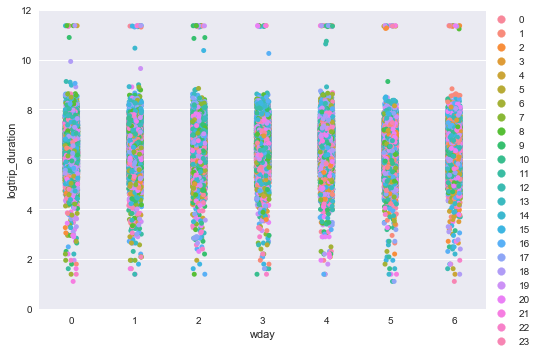

In [120]:
sns.stripplot(x="wday", y="logtrip_duration", hue = "pickup_hour", data = df, jitter = True)
plt.ylim(0, 12)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)
plt.show()

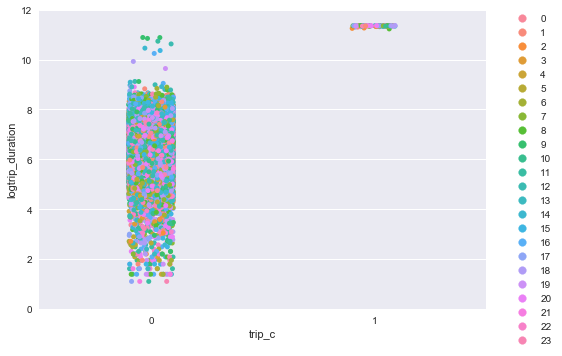

In [121]:
sns.stripplot(x="trip_c", y="logtrip_duration", hue = "pickup_hour", data = df, jitter = True)
plt.ylim(0, 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
'''
# trip_duration과 logtrip_duration의 kernel density graph
# 아래의 sns는 너무 오래걸림
sns.distplot(df.trip_duration, kde = True, rug = True)
plt.show()
sns.distplot(df.logtrip_duration, kde = True, rug = True)
plt.show()

In [129]:
x = cols[2:11] # feature list(vendor_id, pickup_monty, wday, pickup_day, pickup_hour, passenser_count)
y = cols[1:2] # target list(logtrip_duration)

In [130]:
sns.pairplot(df[y + x])
plt.show()

TypeError: '<' not supported between instances of 'str' and 'float'

### Temp ols
* StatsModels를 사용한 ols

In [131]:
x = cols[2:3] # feature x1
y = cols[1:2] # target list

In [132]:
dfX0 = pd.DataFrame(df, columns = x) # feature dataframe 생성
# add_constant는 y절편을 의미(모형에서 상수값), 이를 생성하지 않을경우 y절편이 0으로 고정되어 모형이 왜곡됨
dfX = sm.add_constant(dfX0) # 값을 1로 갖는 column vector를 생성하여 X dataframe에 추가
dfy = pd.DataFrame(df, columns = y) # feature dataframe 생성

In [135]:
model_taxi = smf.ols(formula = 'logtrip_duration ~ passenger_count + C(wday_c) + C(category_trip)', data = df)
result_taxi = model_taxi.fit()
print(result_taxi.summary())

                            OLS Regression Results                            
Dep. Variable:       logtrip_duration   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     1296.
Date:                Tue, 17 Oct 2017   Prob (F-statistic):               0.00
Time:                        05:47:53   Log-Likelihood:                -80618.
No. Observations:               70177   AIC:                         1.612e+05
Df Residuals:                   70173   BIC:                         1.613e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.40

In [ ]:
from patsy import dmatrix

In [77]:
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis = 1)]

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

* time-series data outlier 확인  
[참고사이트](https://ocefpaf.github.io/python4oceanographers/blog/2015/03/16/outlier_detection/)

In [37]:
def get_median_filtered(signal, threshold=3):
    signal = signal.copy()
    difference = np.abs(signal - np.median(signal))
    median_difference = np.median(difference)
    if median_difference == 0:
        s = 0
    else:
        s = difference / float(median_difference)
    mask = s > threshold
    signal[mask] = np.median(signal)
    return signal

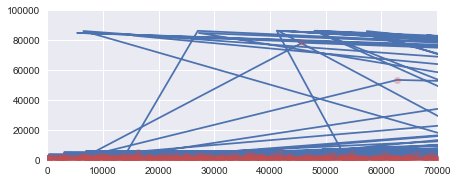

In [38]:
figsize = (7, 2.75)
kw = dict(marker='o', linestyle='none', color='r', alpha=0.3)

df['trip_duration_medf'] = get_median_filtered(df.trip_duration.values, threshold=3)

outlier_idx = np.where(df['trip_duration_medf'].values != df.trip_duration.values)[0]

fig, ax = plt.subplots(figsize=figsize)
df.trip_duration.plot()
df.trip_duration[outlier_idx].plot(**kw)
_ = ax.set_ylim(0, 100000)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
df.plt.scatter('pickup_datetime1', 'trip_duration')
plt.show()

In [ ]:
plt.scatter(df.pickup_datetime1, df.trip_duration)
plt.xlabel("pickup")
plt.ylabel("trip_duration")
plt.show()

* OLS를 통한 outlier 확인

In [43]:
from sklearn.datasets import make_regression
import statsmodels.formula.api as sm

In [ ]:
dfX0 = pd.DataFrame(df, columns = x) # feature dataframe 생성
# add_constant는 y절편을 의미(모형에서 상수값), 이를 생성하지 않을경우 y절편이 0으로 고정되어 모형이 왜곡됨
dfX = sm.add_constant(dfX0) # 값을 1로 갖는 column vector를 생성하여 X dataframe에 추가
dfy = pd.DataFrame(df, columns = y) # feature dataframe 생성

In [ ]:
dfX.tail()

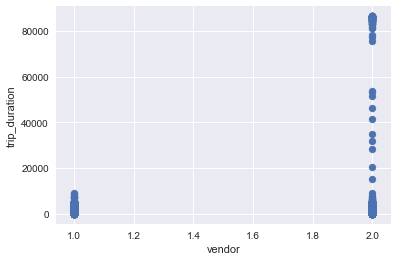

In [20]:
plt.scatter(df.vendor_id, df.trip_duration)
plt.xlabel("vendor")
plt.ylabel("trip_duration")
plt.show()

In [75]:
from patsy import dmatrix

In [148]:
dmatrix("df.wday")

DesignMatrix with shape (70177, 7)
  Columns:
    ['Intercept',
     'df.wday[T.1]',
     'df.wday[T.2]',
     'df.wday[T.3]',
     'df.wday[T.4]',
     'df.wday[T.5]',
     'df.wday[T.6]']
  Terms:
    'Intercept' (column 0), 'df.wday' (columns 1:7)
  (to view full data, use np.asarray(this_obj))

In [149]:
model = sm.OLS.from_formula("logtrip_duration ~ C(wday) + 0", df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       logtrip_duration   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     41.84
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           3.05e-51
Time:                        05:54:51   Log-Likelihood:                -82385.
No. Observations:               70177   AIC:                         1.648e+05
Df Residuals:                   70170   BIC:                         1.648e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C(wday)[0]     6.4056      0.008    772.106      0.0

In [150]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

In [151]:
print("hat.sum() =", hat.sum())

hat.sum() = 7.0


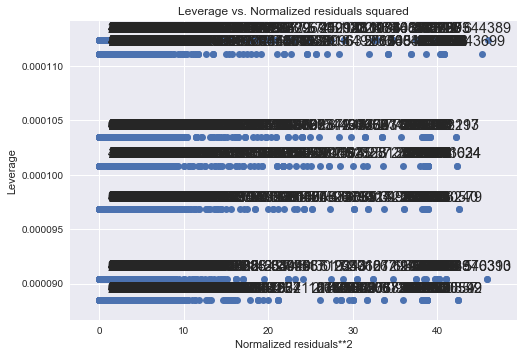

In [152]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

In [158]:
model = smf.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

In [ ]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

In [ ]:
# pickup_month data histogram
plt.hist(taxi_df.wday)
plt.show()

In [ ]:
plt.hist(taxi_df.pickup_month)
plt.show()

In [ ]:
plt.hist(x, bins=None, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)

In [ ]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize = (10, 2))
plt.stem(hat)
plt.show()

In [ ]:
plt.figure(figersize=(10, 2))
plt.stem(result.)

In [ ]:
sns.rugplot(taxi_df.trip_duration)
plt.show()

In [ ]:
sns.kdeplot(taxi_df.trip_duration)
plt.show()

In [ ]:
sns.distplot(taxi_df.trip_duration, kde = True)
plt.show()

In [ ]:
newdf = taxi_df.copy()

In [ ]:
newdf = taxi_df.copy()
trip_duration = newdf.groupby('trip_duration')
newdf[np.abs(newdf.trip_duration - newdf.trip_duration.mean()) <= (3 * newdf.trip_duration.std())]
newdf['outlier'] = trip_duration.transform(lambda x: abs(x - x.mean()) > 1.96 * x.std())

In [ ]:
newdf

In [ ]:
plt.scatter(taxi_df.vendor_id, taxi_df.trip_duration)

In [ ]:
# vendor_id와 trip_duration간 scatter graph 
plt.scatter(len(taxi_df.vendor_id), taxi_df.trip_duration)

In [ ]:
plt.scatter(taxi_df.vendor_id, taxi_df.trip_duration)
plt.ylim(1930000, 1950000)

In [ ]:
plt.scatter(taxi_df.vendor_id, taxi_df.trip_duration)
plt.ylim(0, 150000)

In [ ]:
plt.scatter(taxi_df.pickup_latitude, taxi_df.pickup_longitude, s = taxi_df.trip_duration)

In [ ]:
mpl.rcParams['agg.path.chunksize'] = 10000

In [ ]:
# pickup_month data 확인을 위해 grouping
month_group = taxi_df.groupby('pickup_month')

In [ ]:
# pickup_month의 value*column별 관측치 수 확인
month_group.count()

In [ ]:
# size함수를 통해 pickup_month의 value별 관측치 수 확인(count와 size의 차이 : size는 NaN값을 포함해서 세고, count는 NaN값을 세지 않음)
month_group.size().sort_values(ascending = False)

In [95]:
df.head()

,trip_duration,logtrip_duration,vendor_id,pickup_month,wday,pickup_day,pickup_hour,passenger_count,category_trip,id,...,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_year,yday,nwday,pickup_month_c
241061,1000,6.908755,1,3,0,21,14,1,0,id3441354,...,2016-03-21 14:50:00,-73.971970,40.761642,-73.991158,40.750072,N,2016,81,Monday,0
685646,730,6.594413,2,1,0,4,11,1,0,id0985993,...,2016-01-04 12:11:00,-73.998474,40.745346,-73.988899,40.777729,N,2016,4,Monday,0
431330,1486,7.304516,1,2,3,18,22,3,0,id0695961,...,2016-02-18 22:56:00,-73.989792,40.746990,-73.960960,40.766827,N,2016,49,Thursday,0
356863,452,6.115892,1,3,2,2,13,2,0,id1113960,...,2016-03-02 13:48:00,-73.979637,40.752895,-73.981476,40.759377,N,2016,62,Wednesday,0
225044,566,6.340359,1,3,3,24,10,2,0,id2878431,...,2016-03-24 11:08:00,-73.994743,40.745583,-74.006577,40.732033,N,2016,84,Thursday,0


* 2016년 뉴욕 날씨 데이터를 입력하여 yday를 기준변수로 활용하여 기존 data frame에 merge함

In [ ]:
# 2016년 뉴욕 날씨 데이터 입력
wdf = pd.read_csv('weather_data_nyc_centralpark_2016.csv')

In [ ]:
wdf['date'] = pd.to_datetime(wdf.date,format='%d-%m-%Y')
wdf['yday'] = wdf.date.dt.dayofyear
# wdf['wday'] = wdf.date.dt.dayofweek
# wday변수는 wdf에서 안만들어도 될 것 같아서 만들지 않음
# merge하는데 필요한 기준 변수는 1개면 충분하다고 판단함

In [ ]:
# data확인결과 pricipitation 등의 변수에 숫자가 아닌 T가 있음
wdf.head(10)
# T는 측정되지 않았으나 비가왔던 흔적을 의미함
#"T" stands for "trace", used when precipitation has been detected, but it isn't sufficient to measure meaningfully.

In [ ]:
# T를 아주 작은 수로 바꿔줌(여기서는 0.01로 변경)
falls = [ 0.01 if c=='T' else float(c) for c in wdf['snow fall']]
rain = [ 0.01 if c=='T' else float(c) for c in wdf['precipitation']]
wdf['snow fall']= falls
wdf['precipitation'] = rain

In [ ]:
# 'yday' 변수를 기준변수로 taxi_df에 wdf를 merge함
# (yday를 기준으로 taxi_df에 wdf의 data를 가로로 붙인다.)
taxi_df = pd.merge(taxi_df,wdf,on='yday')
taxi_df

In [ ]:
# 필요없는 변수 삭제(maximum과 minimum은 같은 지역으로 다 같기 때문에 삭제)
taxi_df = taxi_df.drop(['date','maximum temperature','minimum temperature'], axis=1)
df.head()

 ##### (2) 공간변수(or 지도정보, 위치정보) 사용 
  * 지도정보(위치정보)를 활용하기 위해서는 folium(포리움)함수를 사용해야 함

In [ ]:
# Read in the airports data.
pickup = pd.read_csv("train.csv", dtype=str)

In [ ]:
pickup.head()

In [ ]:
import folium

# Get a basic world map.
taxi_map = folium.Map(location=[30, 0], zoom_start=2)
# Draw markers on the map.
for name, row in airports.iterrows():
    # For some reason, this one airport causes issues with the map.
    if row["vendor_id"] != "South Pole Station":
        taxi_map.circle_marker(location=[row["latitude"], row["longitude"]], popup=row["name"])
# Create and show the map.
airports_map.create_map('airports.html')
airports_map

In [ ]:
# Read in the airlines data.
pickup = pd.read_csv("airlines.csv", header=None, dtype=str)
airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]

In [ ]:
# Read in the airports data.
pickup = pandas.read_csv("train.csv", dtype=str)

# Read in the airlines data.
airlines = pandas.read_csv("airlines.csv", header=None, dtype=str)
airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]
# Read in the routes data.
routes = pandas.read_csv("routes.csv", header=None, dtype=str)
routes.columns = ["airline", "airline_id", "source", "source_id", "dest", "dest_id", "codeshare", "stops", "equipment"]

In [ ]:
location_df = pd.DataFrame(columns = ['pickup_latitude','pickup_longitude'])

ctr = 0
for place in query_result.places:
    for key, item in place.geo_location.items():
        df.loc[ctr, key] = item
    ctr += 1

In [ ]:
taxi_df['pickup_locations'] = taxi_df['pickup_latitude', 'pickup_longitude']

### 3. Data Analysis
#### 1) 변수간 상관관계 분석
* (temp) 독립변수(ex.pickup_month_c)와 종속변수(ex.trip_duration)의 상관관계 확인
* 상관계수 해석
    * +값은 비례, -값은 반비례를 의미
    * 상관계수의 크기에 따른 해석은 관행적으로 이뤄지는 것으로, 이론적 근거는 없음
        * 1.0 ~ 0.7 매우 강한 관련성
        * 0.7 ~ 0.4 상당한 관련성
        * 0.4 ~ 0.2 약간의 관련성
        * 0.2 ~ 0.0 관련성 없음

In [162]:
# 설명변수 type이 int나 float와 같은 real변수일 경우
df[['trip_duration','passenger_count']].corr()

,trip_duration,passenger_count
trip_duration,1.000000,0.016159
passenger_count,0.016159,1.000000


In [167]:
# category변수일 경우(p-value를 소수점 2자리로 나오게 하는 방법 필요할 듯)
from scipy.stats import spearmanr, kendalltau, pearsonr
spearmanr(df['logtrip_duration'], df['pickup_hour'])

SpearmanrResult(correlation=0.034014816268616993, pvalue=1.9996071385603067e-19)

In [62]:
#correlation 확인
df['logtrip_duration'].corr(df['pickup_month'])

0.037865077496527767

In [63]:
#correlation 확인
df['logtrip_duration'].corr(df['wday'])

-0.022528865221105827

In [64]:
#correlation 확인
df['logtrip_duration'].corr(df['wday'])

-0.022528865221105827

In [68]:
df.corr()

,trip_duration,logtrip_duration,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
trip_duration,1.000000,0.395594,0.016159,0.077656,-0.045875,0.047041,-0.031623
logtrip_duration,0.395594,1.000000,0.014370,0.198238,-0.167445,0.137414,-0.136664
passenger_count,0.016159,0.014370,1.000000,0.002791,-0.003426,0.000258,0.000014
pickup_longitude,0.077656,0.198238,0.002791,1.000000,-0.137972,0.280508,0.050241
pickup_latitude,-0.045875,-0.167445,-0.003426,-0.137972,1.000000,0.048937,0.441590
dropoff_longitude,0.047041,0.137414,0.000258,0.280508,0.048937,1.000000,0.144096
dropoff_latitude,-0.031623,-0.136664,0.000014,0.050241,0.441590,0.144096,1.000000


In [66]:
df.values

array([[1000, 6.90875477931522, 1, ..., 2016, 81, 'Monday'],
       [730, 6.594413459749778, 2, ..., 2016, 4, 'Monday'],
       [1486, 7.304515946460155, 1, ..., 2016, 49, 'Thursday'],
       ..., 
       [6, 1.9459101490553132, 2, ..., 2016, 21, 'Thursday'],
       [655, 6.486160788944089, 1, ..., 2016, 54, 'Tuesday'],
       [340, 5.831882477283517, 2, ..., 2016, 114, 'Saturday']], dtype=object)

In [67]:
df.head()

,trip_duration,logtrip_duration,vendor_id,pickup_month,wday,pickup_day,pickup_hour,passenger_count,category_trip,id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_year,yday,nwday
241061,1000,6.908755,1,3,0,21,14,1,0,id3441354,2016-03-21 14:34:00,2016-03-21 14:50:00,-73.971970,40.761642,-73.991158,40.750072,N,2016,81,Monday
685646,730,6.594413,2,1,0,4,11,1,0,id0985993,2016-01-04 11:59:00,2016-01-04 12:11:00,-73.998474,40.745346,-73.988899,40.777729,N,2016,4,Monday
431330,1486,7.304516,1,2,3,18,22,3,0,id0695961,2016-02-18 22:32:00,2016-02-18 22:56:00,-73.989792,40.746990,-73.960960,40.766827,N,2016,49,Thursday
356863,452,6.115892,1,3,2,2,13,2,0,id1113960,2016-03-02 13:41:00,2016-03-02 13:48:00,-73.979637,40.752895,-73.981476,40.759377,N,2016,62,Wednesday
225044,566,6.340359,1,3,3,24,10,2,0,id2878431,2016-03-24 10:59:00,2016-03-24 11:08:00,-73.994743,40.745583,-74.006577,40.732033,N,2016,84,Thursday


In [ ]:
taxi_df['pickup_month'].value_counts()

In [ ]:
pickup_date_group = taxi_df.groupby(lambda pickup_datetime : pickup_datetime.split(' ')[0])
pickup_date_group.head()

In [ ]:
taxi_df.reset_index(inplace=True)

In [ ]:
taxi_df.head()

In [ ]:
taxi_df.shape

In [ ]:
taxi_df.head()

In [ ]:
taxi_df.describe()

In [ ]:
taxi_df.info()

In [80]:
dfy = df.ix[:,1:2]
dfX = df.ix[:,2:9]
print(len(dfy.columns), len(dfX.columns))

1 7


C:\Users\best0\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [81]:
dfy.tail()

,logtrip_duration
389656,6.159095
29024,6.542472
591321,1.945910
404162,6.486161
44750,5.831882


In [82]:
dfX.tail()

,vendor_id,pickup_month,wday,pickup_day,pickup_hour,passenger_count,category_trip
389656,2,2,3,25,22,1,0
29024,1,4,1,26,8,1,0
591321,2,1,3,21,1,1,0
404162,1,2,1,23,15,2,0
44750,2,4,5,23,10,2,0


In [175]:
df.head()

,trip_duration,logtrip_duration,pickup_month_c,wday_c,vendor_id,pickup_day,pickup_hour,passenger_count,trip_c,pickup_month,...,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_year,yday,nwday
241061,1000,6.908755,1,1,1,21,14,1,0,3,...,2016-03-21 14:34:00,2016-03-21 14:50:00,-73.971970,40.761642,-73.991158,40.750072,N,2016,81,Monday
685646,730,6.594413,0,0,2,4,11,1,0,1,...,2016-01-04 11:59:00,2016-01-04 12:11:00,-73.998474,40.745346,-73.988899,40.777729,N,2016,4,Monday
431330,1486,7.304516,0,0,1,18,22,3,0,2,...,2016-02-18 22:32:00,2016-02-18 22:56:00,-73.989792,40.746990,-73.960960,40.766827,N,2016,49,Thursday
356863,452,6.115892,1,1,1,2,13,2,0,3,...,2016-03-02 13:41:00,2016-03-02 13:48:00,-73.979637,40.752895,-73.981476,40.759377,N,2016,62,Wednesday
225044,566,6.340359,1,1,1,24,10,2,0,3,...,2016-03-24 10:59:00,2016-03-24 11:08:00,-73.994743,40.745583,-74.006577,40.732033,N,2016,84,Thursday


In [179]:
cols_real = ['passenger_count']

In [180]:
cols_cat = ['vendor_id', 'pickup_month', 'wday', 'pickup_hour', 'category_trip']

In [181]:
dfX_real = dfX[cols_real]
print(len(dfX_real.columns))
dfX_real.tail()

KeyError: "['passenger_count'] not in index"

In [86]:
dfX_cat = dfX[cols_cat]
print(len(dfX_cat.columns))
dfX_cat.tail()

5


,vendor_id,pickup_month,wday,pickup_hour,category_trip
389656,2,2,3,22,0
29024,1,4,1,8,0
591321,2,1,3,1,0
404162,1,2,1,15,0
44750,2,4,5,10,0


In [87]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', '_classic_test']


In [88]:
for i in range(0, len(cols_real), 4):
    print("dfX{}".format(cols_real[i: i+4]))

dfX['passenger_count']


In [ ]:
sns.barplot(x="pickup_datetime", y="trip_duration", data=df)

##### (참고) datetime variable 조정
* pandas의 datetimeIndex로 datetime변수를 만들면 보통 시간(초(second) 단위)까지 생성됨
* datetime변수가 날짜만 필요할 때 활용
    1. old_datetime variable을 str type으로 변경
    1. 필요한 단위까지 slicing해서 new_datetime 변수 생성
    1. datetime type으로 변경
***
* time-series graph 그릴때 datetime 변수를 index로 설정

    * datetime 변수를 index로 설정  
df = df.set_index('datetime_variable')

    * index 초기화(index로 사용되던 변수를 column으로 보내고, 다시 본래 index)  
df = df.reset_index() # index reset

In [ ]:
'''
# pickuptime variable을 일까지의 단위로 조정

df.pickup_datetime = df.pickup_datetime.astype(str)
df['pickup_datetime1'] = df.pickup_datetime.str[:7] # 시간까지만 pickup_datetime
df.pickup_datetime1 = pd.to_datetime(df.pickup_datetime1)
'''

In [ ]:
df = df.set_index('pickup_datetime1') # pickup_datetime1을 index로 설정

In [ ]:
df = df.reset_index() # index reset

##### 참고 : Pandas의 DatetimeIndex와 Python의 Datetime Package는 다름

> Python의 Datetime을 활용해 단위를 변경하는 명령어는 week와 관련된 명령어(weekday(), isoweekday()) 밖에 없음  
year와 month등을 기준(ex.1년 365일 중 4월 30일이 몇 번째 날)으로 datatime type 변수의 단위를 변경하기 위해서는 timetuple이나 strftime를 적용하여 사용하는 방법이 따로 적혀있음.   
그런데 dt.dayofyear, dayofweek, dayofmonth 등의 명령어가 실행이 됨.
[google 검색 결과](https://stackoverflow.com/questions/15707532/python-import-datetime-v-s-from-datetime-import-datetime)에서 import datetime as dt한 것을 보고 dt를 python의 datetime package로 오해함.  
그러나 참고한 자료에서는 import datetime 자체를 하지 않음.  
dt는 python의 datetime를 의미할 수도 있지만 여기서는 아닌 pandas의 **DatetimeIndex**를 의미함  

####### (2) Use the Datetime Package
* **Datatime Package를 이용해 연, 월, 일 변수 생성  **
    * datatime package 설치 : import datetime
    * df['option 기준 변수명'] = df['datetime_type_variable_name'].datetime.option  
        * option(year, month, day, houre, minut, second 등)
            * dataframe_name['시간 기준 변수명'] = dataframe_name['기존변수명'].datetime.hour  
            * dataframe_name['연 기준 변수명'] = dataframe_name['기존변수명'].datetime.year
        * option에 따라 변수값의 기준이 달라짐  
    MINYEAR <= year <= MAXYEAR,  
    1 <= month <= 12,  
    1 <= day <= number of days in the given month and year,  
    0 <= hour < 24,  
    0 <= minute < 60,  
    0 <= second < 60,  
    0 <= microsecond < 1000000,  
    fold in [0, 1].  
---
* **Datetime Package의 timetuple 또는 strftime module을 활용한 단위 변경  **
> *패키지(Packages)는 도트(.)를 이용하여 파이썬 모듈을 계층적(디렉터리 구조)으로 관리할 수 있게 해준다. 예를 들어 모듈명이 A.B인 경우 A는 패키지명이 되고 B는 A 패키지의 B 모듈이 된다.  *



    * datetime package만을 활용한 단위 변경
        * week 기준 day 산출(7일 중 몇 번째 일(요일을 알 수 있음))  
            * df['week 단위 변수명'] = df['기존변수명'].dt.weekday   
            df['week 단위 변수명'] = df['기존변수명'].dt.isoweekday  
            df['week 단위 변수명'] = df['기존변수명'].dt.weekday_name 
> weekday : monday == 0 ... sunday == 6  
            isoweekday : monday == 1 ... sunday == 7   
            weekday_name : monday == monday ... sunday == sunday  
        * year 기준 day 산출(해당년 첫번째날(1월 1일) == 1을 기준으로 1년 중 몇 번째 일인지 알 수 있음)  
       > df['year 단위 변수명'] = df['기존변수명'].dt.dayofyear   
 
        * month 기준 day 산출(해당월 첫번째 날 == 1을 기준으로 해당 월 중 몇 번째 일인지 알 수 있음)  
       > df['month 단위 변수명'] = df['기존변수명'].dt.dayofmonth  
        * dayofweek도 실행됨
---
* 참고
    * timetuple 활용
        * df['new_variable'] = df['datetime_variable'].dt.timetuple(option)
        * option : d.year, d.month, d.day, d.hour, d.minute, d.second, d.weekday(), yday, dst  
    MINYEAR <= year <= MAXYEAR  
    1 <= month <= 12  
    1 <= day <= number of days in the given month and year 
    * strftime 활용
        * df['new_variable'] = df['datetime_variable'].dt.strftime('%j')  
        %j는 c언어로 day of the year as a zero-padded decimal number를 의미함  
        pandas datetimeindex의 dayofyear와 같음

In [ ]:
import datetime
taxi_df['temp'] = taxi_df['pickup_datetime'].dt.strftime('%j')